1. Introduction:
This case study focuses on implementing logistic regression to assign lead scores for X Education, aiding in the identification of 'Hot Leads' with a targeted approach to achieve the company's goal of an 80% lead conversion rate.

**Problem Statement:**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals of the Case Study:**
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so these will be needed to handle as well. These problems are provided in a separate doc file.

#Logistic Regression Case Study: Create a logistic regression model to analyse the lead score.

# 1**. Import Libraries, Suppress Warnings and Set Display**

In [462]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
#statmodel libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')


In [463]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# **2. 📖 Reading the Data**

In [464]:
#Step 1: Importing data
lead_df=pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [465]:
lead_df.shape

(9240, 37)

In [466]:
# Check data types of columns and nulls
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<strong><span style="color:blue">NOTE:</span></strong> There are **`null values`** in the dataframe

# **Step 2: Data Understanding and Inspection**

In [467]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and
# also spot anything unusual
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [468]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'What matters most to you in choosing a course',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [469]:
# checking number of unique values in each column
lead_df.nunique()

,0
Prospect ID,9240
Lead Number,9240
Lead Origin,5
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1731
Page Views Per Visit,114


NOTE: There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step

In [470]:
#missing data percentage
round(100*(lead_df.isnull().sum()/lead_df.shape[0]),2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


# **Step 3: Data Cleaning**

Data Cleaning and Encoding
Looking at the data set we observe that we need to do the following before we proceed further:


*   Encoding categorical variables
*   Missing value handling
*   Convert the 'Select' value into NaN
*   Dropping the columns which have more than 40% missing data

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null(NaN) values.

In [471]:
#Encoding the variable with yes/no
for feature in ['Do Not Email', 'Do Not Call',
                'Search', 'Magazine', 'Newspaper Article',
                'X Education Forums', 'Newspaper', 'Digital Advertisement',
                'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
                'A free copy of Mastering The Interview']:
   lead_df[feature]=lead_df[feature].map({'Yes':1,'No':0})
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [472]:
# We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list,
#hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.
lead_df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 7802 non-null   object
 6   How did you hear about X Education             7033 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [473]:
lead_df = lead_df.replace('Select', np.nan)

In [474]:
lead_df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [475]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in lead_df.columns if len(lead_df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


NOTE: Now, there are no 'Select' values in the dataframe df_leads.

In [476]:
(round(lead_df.isnull().sum()/len(lead_df.index),2)*100).sort_values(ascending=False)

,0
How did you hear about X Education,78.0
Lead Profile,74.0
Lead Quality,52.0
Asymmetrique Profile Score,46.0
Asymmetrique Activity Score,46.0
Asymmetrique Profile Index,46.0
Asymmetrique Activity Index,46.0
City,40.0
Specialization,37.0
Tags,36.0


We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [477]:
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [478]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*lead_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

#1) Column: 'Specialization'
This column has 37% missing values

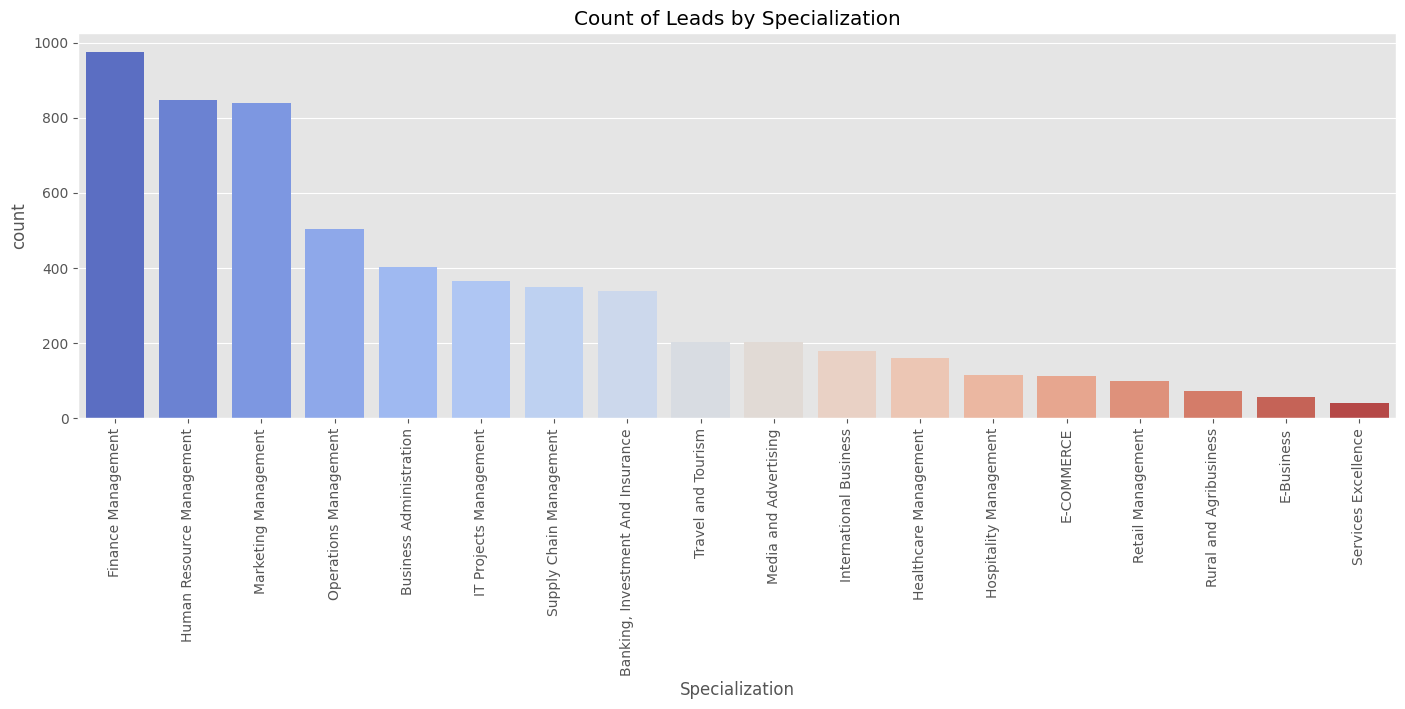

In [479]:
specialization_counts = lead_df['Specialization'].value_counts()

plt.figure(figsize=(17,5))
sns.countplot(x='Specialization', data=lead_df, order=specialization_counts.index, palette='coolwarm')
plt.title('Count of Leads by Specialization')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.show()

In [480]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others')

##2) Tags column
'Tags' column has 36% missing values

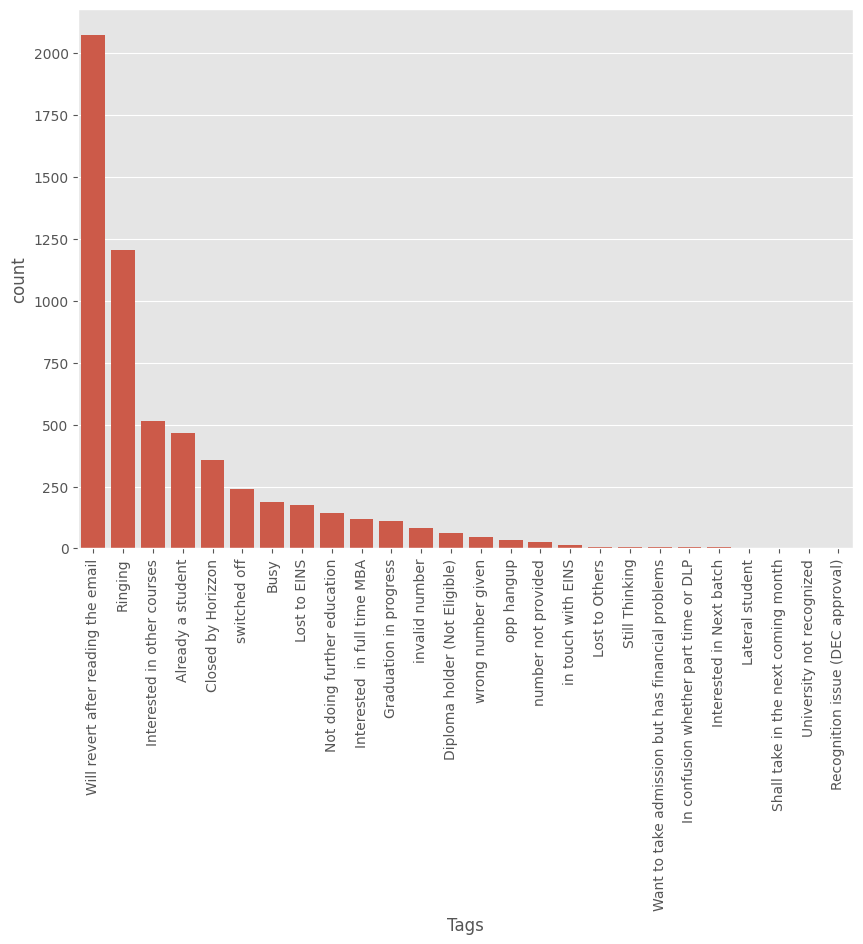

In [481]:
# Visualizing Tags column
tags_counts = lead_df['Tags'].value_counts()

plt.figure(figsize=(10,7))
sns.countplot(x='Tags', data=lead_df, order=tags_counts.index)
plt.xticks(rotation=90)
plt.show()

In [482]:
#Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

##3) Column: 'What matters most to you in choosing a course'
This column has 29% missing values

([0, 1, 2],
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

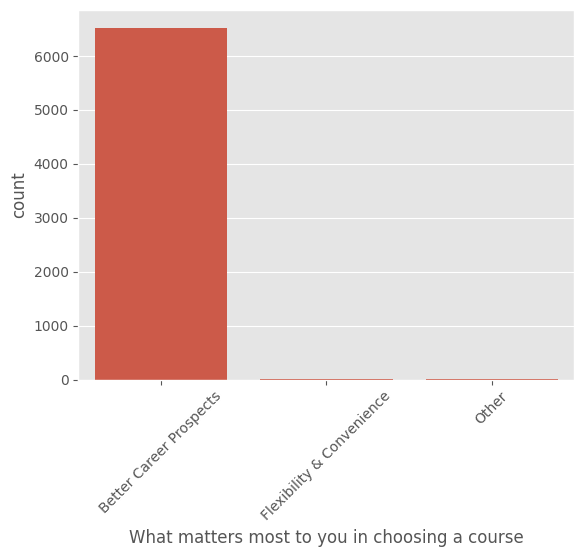

In [483]:
# Visualizing this column
most_matters_count = lead_df['What matters most to you in choosing a course'].value_counts()
sns.countplot(x='What matters most to you in choosing a course', data=lead_df, order=most_matters_count.index)
plt.xticks(rotation=45)

In [484]:
round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

,proportion
What matters most to you in choosing a course,
Better Career Prospects,100.0
Flexibility & Convenience,0.0
Other,0.0


In [485]:
#We can see that this is highly skewed column so we can remove this column.
# Dropping this column
lead_df=lead_df.drop('What matters most to you in choosing a course',axis=1)

##4) Column: 'What is your current occupation'
This column has 29% missing values

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Working Professional'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Housewife'),
  Text(5, 0, 'Businessman')])

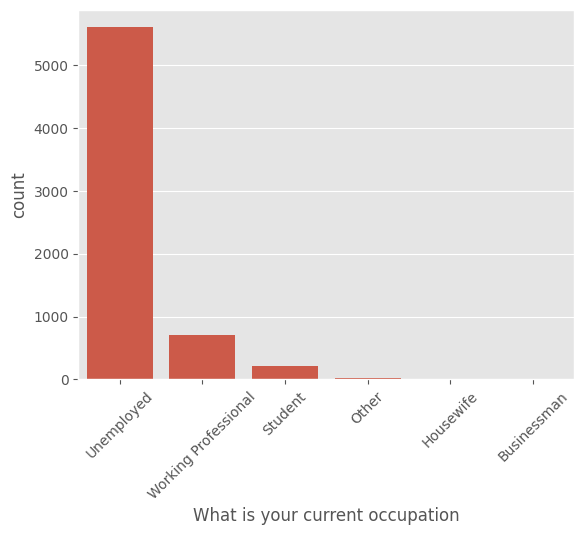

In [486]:
current_occupation_count = lead_df['What is your current occupation'].value_counts()
sns.countplot(x='What is your current occupation', data=lead_df, order=current_occupation_count.index)
plt.xticks(rotation=45)

In [487]:
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

,proportion
What is your current occupation,
Unemployed,85.0
Working Professional,11.0
Student,3.0
Other,0.0
Housewife,0.0
Businessman,0.0


In [488]:
#Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unknown')

##5) Column: 'Country'
#This column has 27% missing values

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Arab Emirates'),
  Text(3, 0, 'Singapore'),
  Text(4, 0, 'Saudi Arabia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Hong Kong'),
  Text(9, 0, 'Bahrain'),
  Text(10, 0, 'Oman'),
  Text(11, 0, 'France'),
  Text(12, 0, 'unknown'),
  Text(13, 0, 'South Africa'),
  Text(14, 0, 'Nigeria'),
  Text(15, 0, 'Germany'),
  Text(16, 0, 'Kuwait'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Sweden'),
  Text(19, 0, 'China'),
  Text(20, 0, 'Asia/Pacific Region'),
  Text(21, 0, 'Uganda'),
  Text(22, 0, 'Bangladesh'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Belgium'),
  Text(25, 0, 'Netherlands'),
  Text(26, 0, 'Ghana'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'R

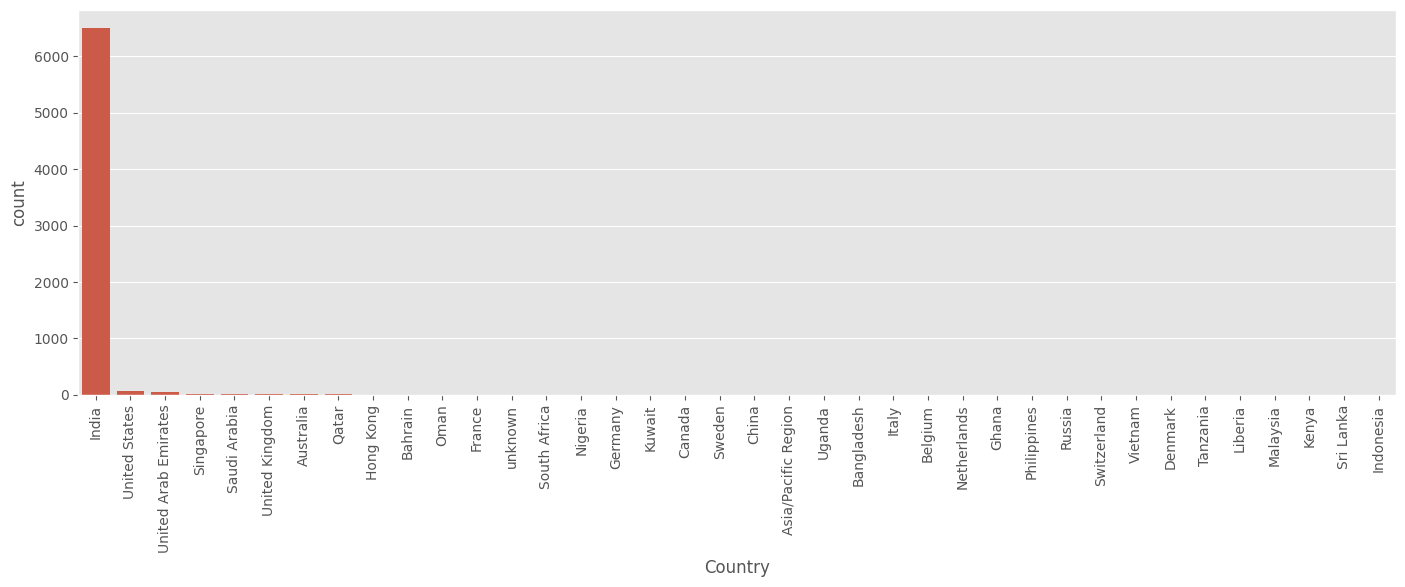

In [489]:
country_count = lead_df['Country'].value_counts()
plt.figure(figsize=(17,5))
sns.countplot(x='Country', data=lead_df, order=country_count.index)
plt.xticks(rotation=90)

In [490]:
###Since the maximum count is of the country 'India' we can replace all the NaN values with 'India'

lead_df['Country']=lead_df['Country'].replace(np.nan,'Unknown')

##6) Column: 'City'
This column has 40% missing values

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Cities'),
  Text(3, 0, 'Other Cities of Maharashtra'),
  Text(4, 0, 'Other Metro Cities'),
  Text(5, 0, 'Tier II Cities')])

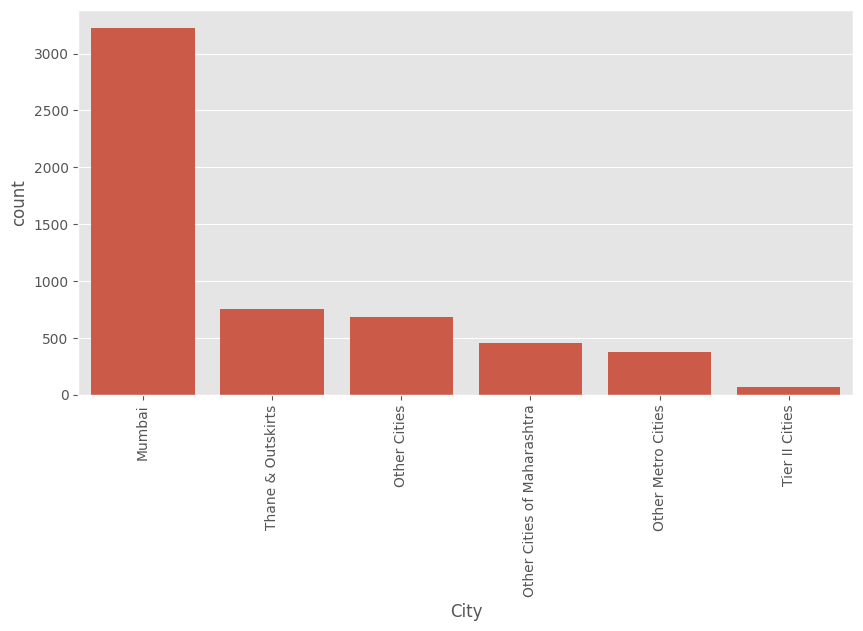

In [491]:
city_count = lead_df['City'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(x='City', data=lead_df, order=city_count.index)
plt.xticks(rotation=90)

In [492]:
round(lead_df['City'].value_counts(normalize=True),2)*100

,proportion
City,
Mumbai,58.0
Thane & Outskirts,13.0
Other Cities,12.0
Other Cities of Maharashtra,8.0
Other Metro Cities,7.0
Tier II Cities,1.0


In [493]:
#Since most values are 'Mumbai' , we can impute missing values in this column with this value.
lead_df['City']=lead_df['City'].replace(np.nan,'Unknown')

In [494]:
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


Rest missing values are under 2% so we can drop these rows.


In [495]:
# Dropping the rows with null values
lead_df.dropna(inplace = True)

In [496]:
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


Now we don't have any missing value in the dataset.

## We can find the percentage of rows retained.

In [497]:
(len(lead_df.index)/9240)*100

98.2034632034632

##We have retained 98% of the rows after cleaning the data .

# ***4. Exploratory Data Analysis***

In [498]:
#Checking for duplicates
lead_df[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity



We see there are no duplicate records in our lead dataset.

# **Univariate Analysis and Bivariate Analysis**

# **1) Converted**
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [499]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

Currently the company has 37.85% lead conversion rate. This means among the targeted people only 37% are converting into customers.

We will try to improve the conversion rate by different approaches.


# **2) Lead Origin**

([0, 1, 2, 3],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

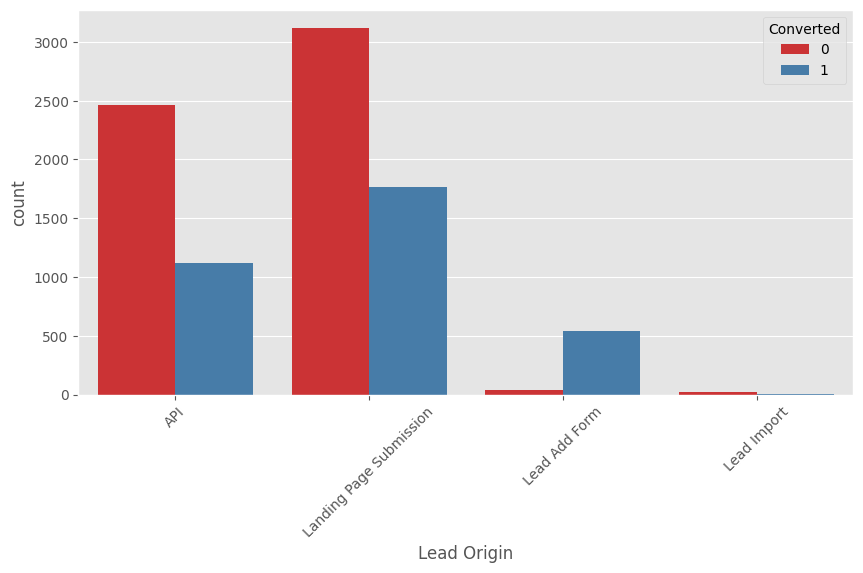

In [500]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 45)

API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
Lead Add Form has more than 90% conversion rate but count of lead are not very high.
Lead Import are very less in count.
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

# **3) Lead Source**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

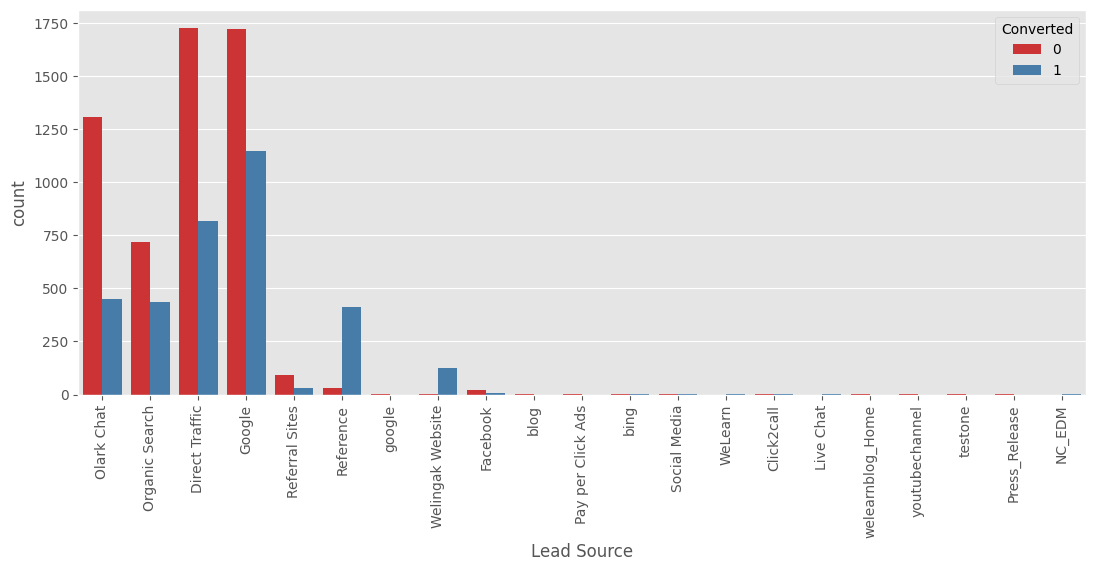

In [501]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df, palette='Set1')
plt.xticks(rotation = 90)

In [502]:
# Need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [503]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

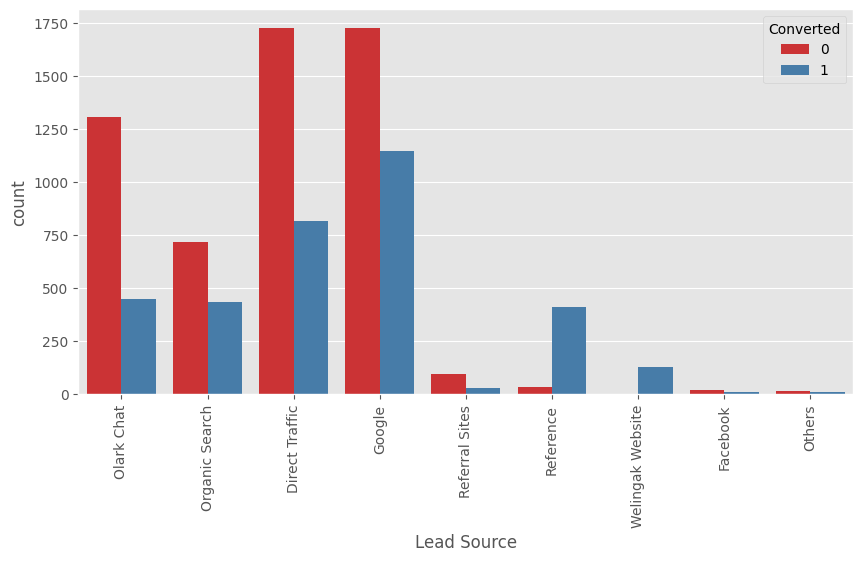

In [504]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)



1.   Google and Direct traffic generates maximum number of leads.
2.   Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

# **4) Do not Email**

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

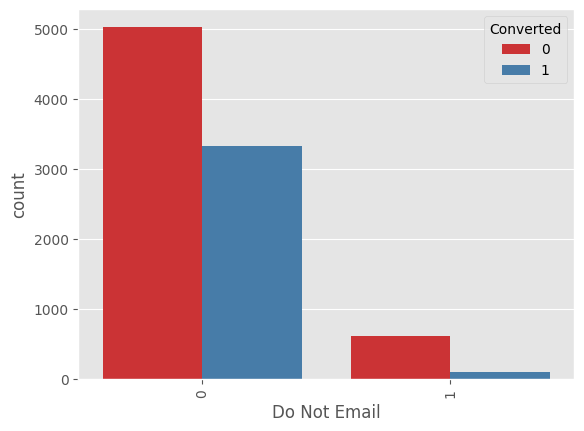

In [505]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

# **5) Do not call**

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

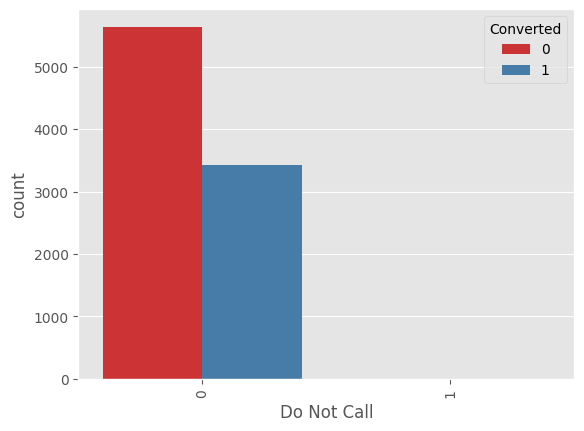

In [506]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

# **6) TotalVisits**

In [507]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
5%,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
90%,7.000000
95%,10.000000


<Axes: ylabel='TotalVisits'>

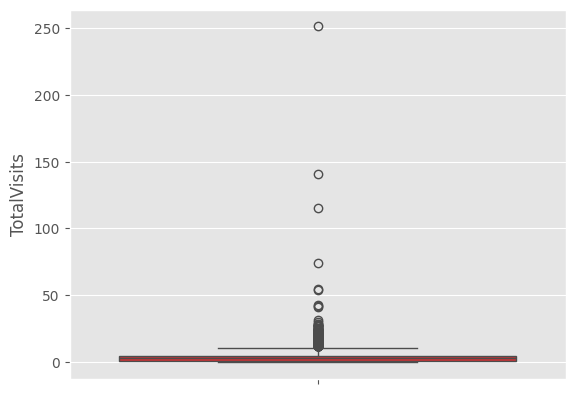

In [508]:
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

**As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.**

In [509]:
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='TotalVisits'>

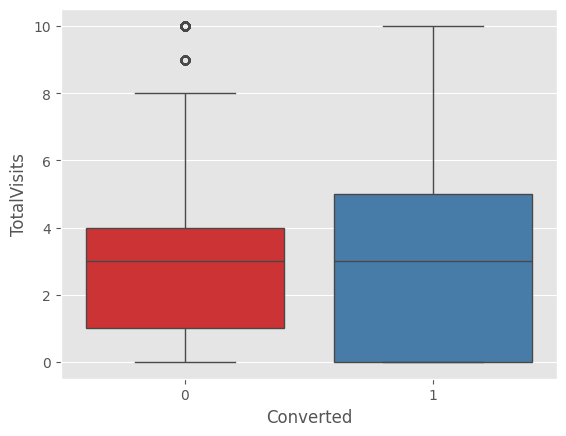

In [510]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette='Set1')

# **7) Total Time Spent on Website**

In [511]:
lead_df['Total Time Spent on Website'].describe()

,Total Time Spent on Website
count,9074.000000
mean,482.887481
std,545.256560
min,0.000000
25%,11.000000
50%,246.000000
75%,922.750000
max,2272.000000


<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

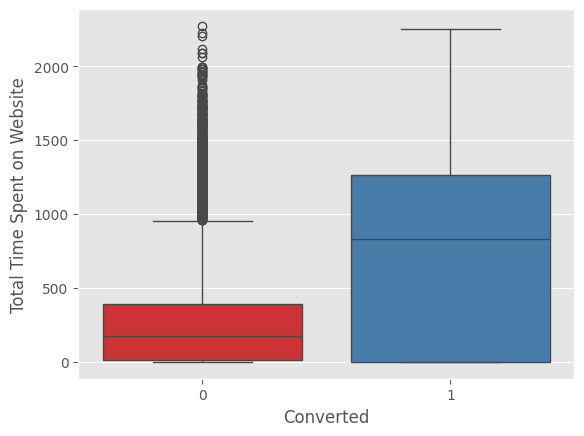

In [512]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set1')

<Axes: ylabel='Total Time Spent on Website'>

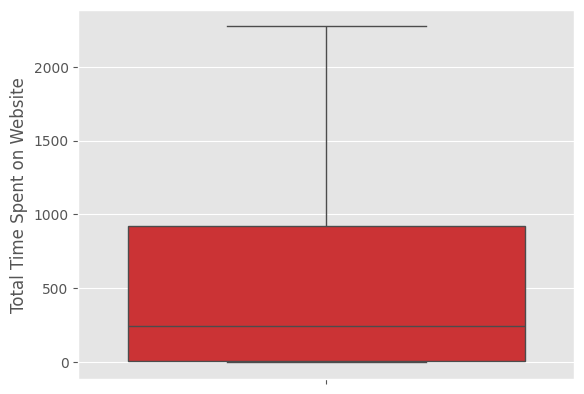

In [513]:

sns.boxplot(lead_df['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

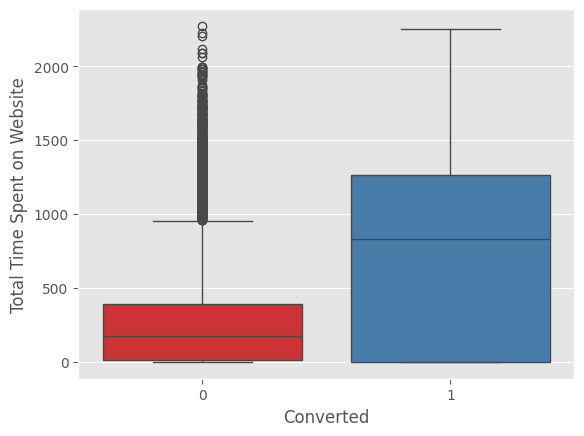

In [514]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set1')

# **8) Page Views Per Visit**

<Axes: ylabel='Page Views Per Visit'>

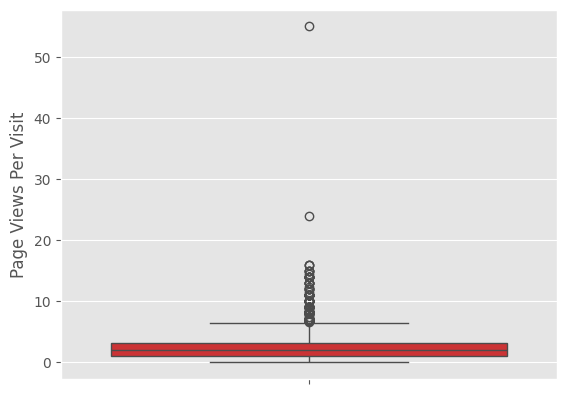

In [515]:
sns.boxplot(lead_df['Page Views Per Visit'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [516]:
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='Page Views Per Visit'>

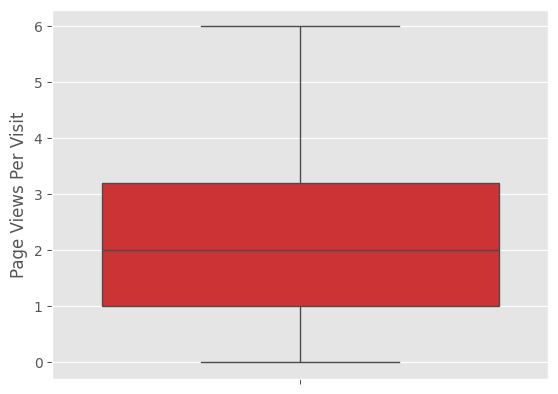

In [517]:
# Visualizing again
sns.boxplot(lead_df['Page Views Per Visit'],palette='Set1',orient='vert')

# **9) Last Activity**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

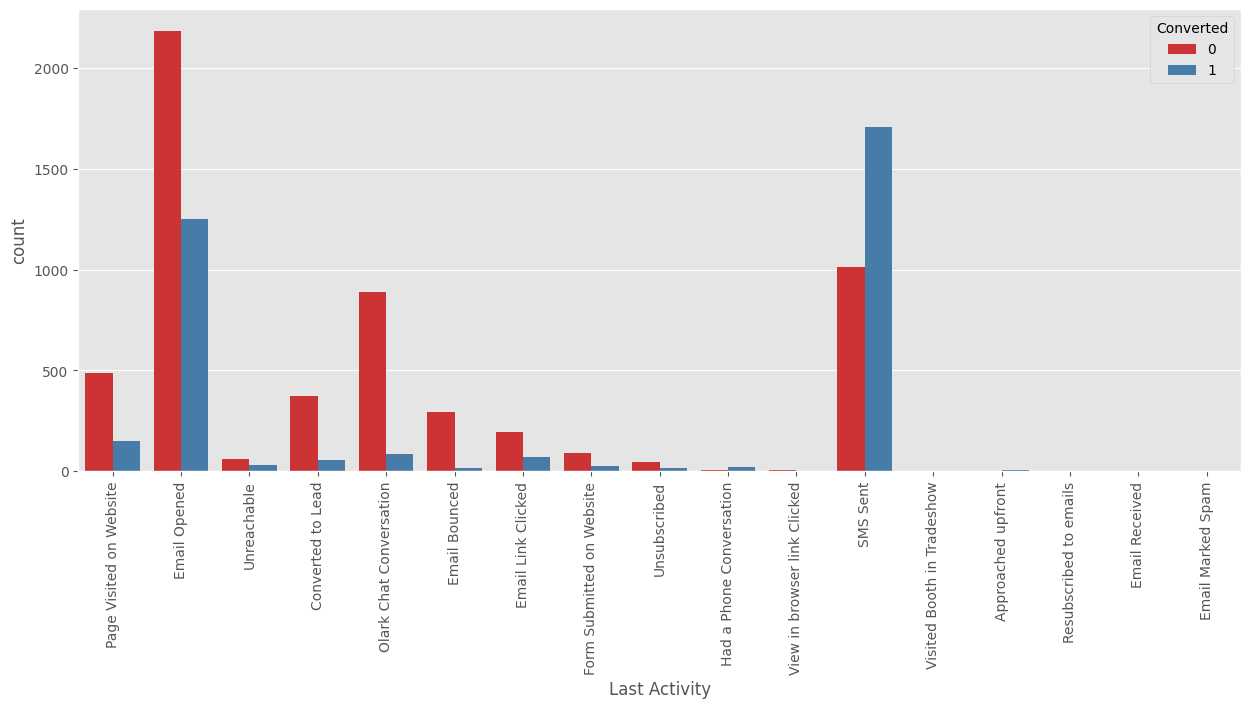

In [518]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

In [519]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

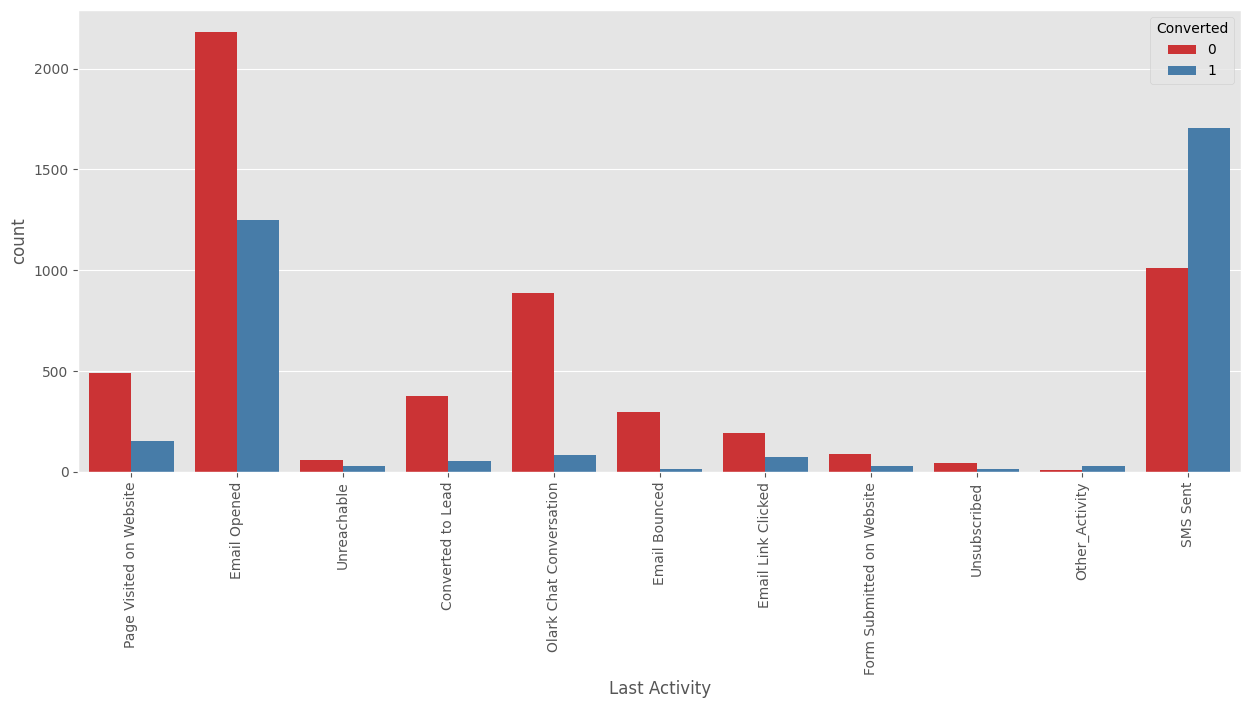

In [520]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

# **10) Country**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Russia'),
  Text(3, 0, 'Kuwait'),
  Text(4, 0, 'Oman'),
  Text(5, 0, 'United Arab Emirates'),
  Text(6, 0, 'United States'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Bahrain'),
  Text(10, 0, 'Ghana'),
  Text(11, 0, 'Singapore'),
  Text(12, 0, 'Qatar'),
  Text(13, 0, 'Saudi Arabia'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'France'),
  Text(16, 0, 'Sri Lanka'),
  Text(17, 0, 'China'),
  Text(18, 0, 'Canada'),
  Text(19, 0, 'Netherlands'),
  Text(20, 0, 'Sweden'),
  Text(21, 0, 'Nigeria'),
  Text(22, 0, 'Hong Kong'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Asia/Pacific Region'),
  Text(25, 0, 'Uganda'),
  Text(26, 0, 'Kenya'),
  Text(27, 0, 'Italy'),
  Text(28, 0, 'South Af

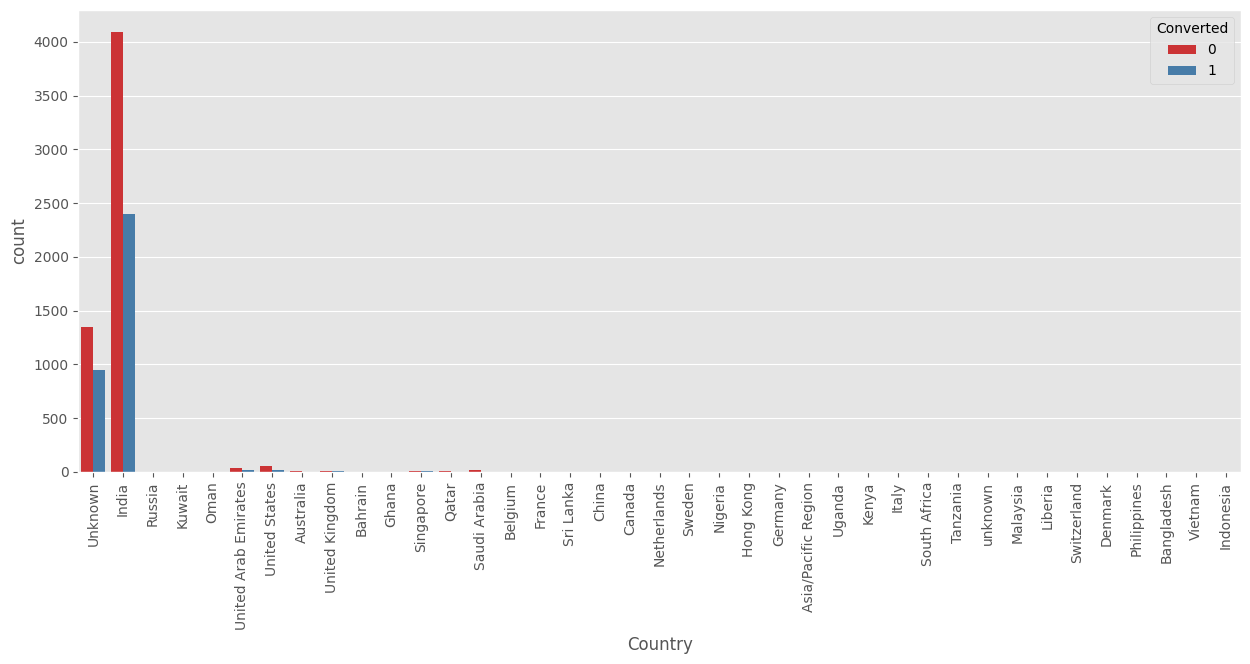

In [521]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

# **11) Specialization**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

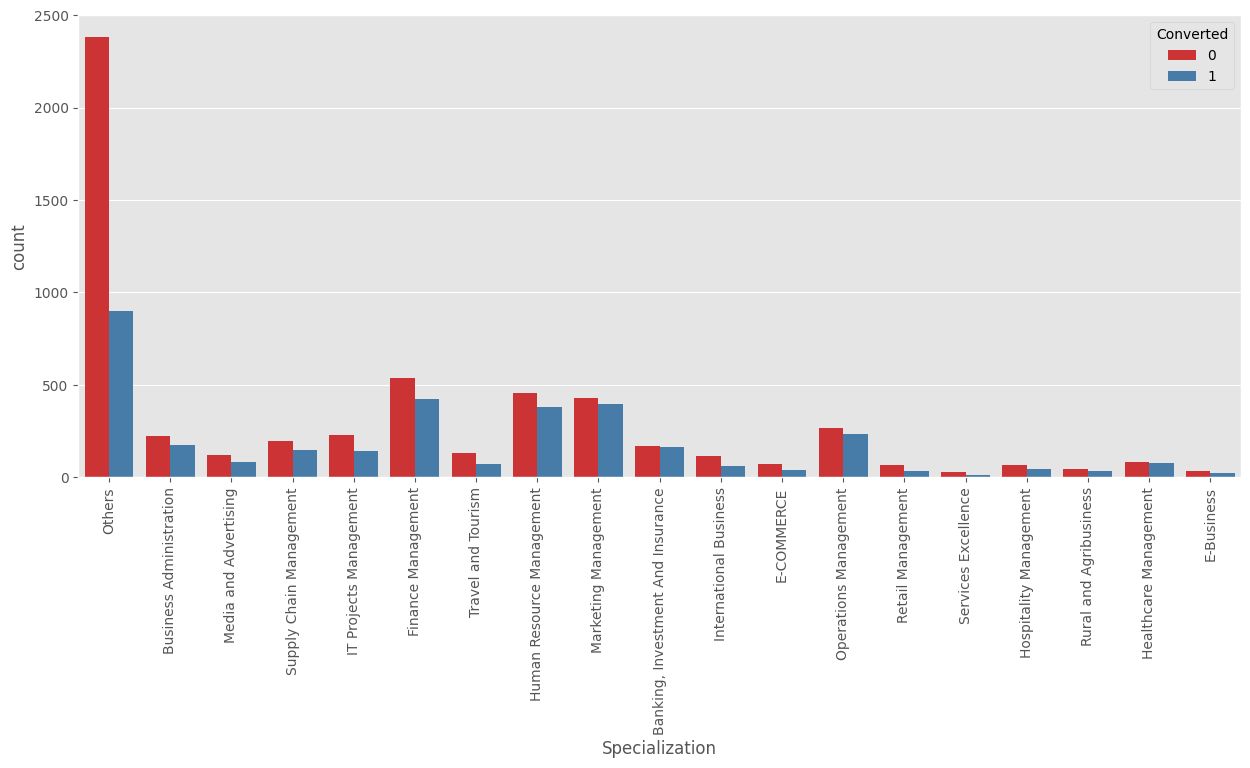

In [522]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

# **12) What is your current occupation**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Working Professional'),
  Text(4, 0, 'Businessman'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Housewife')])

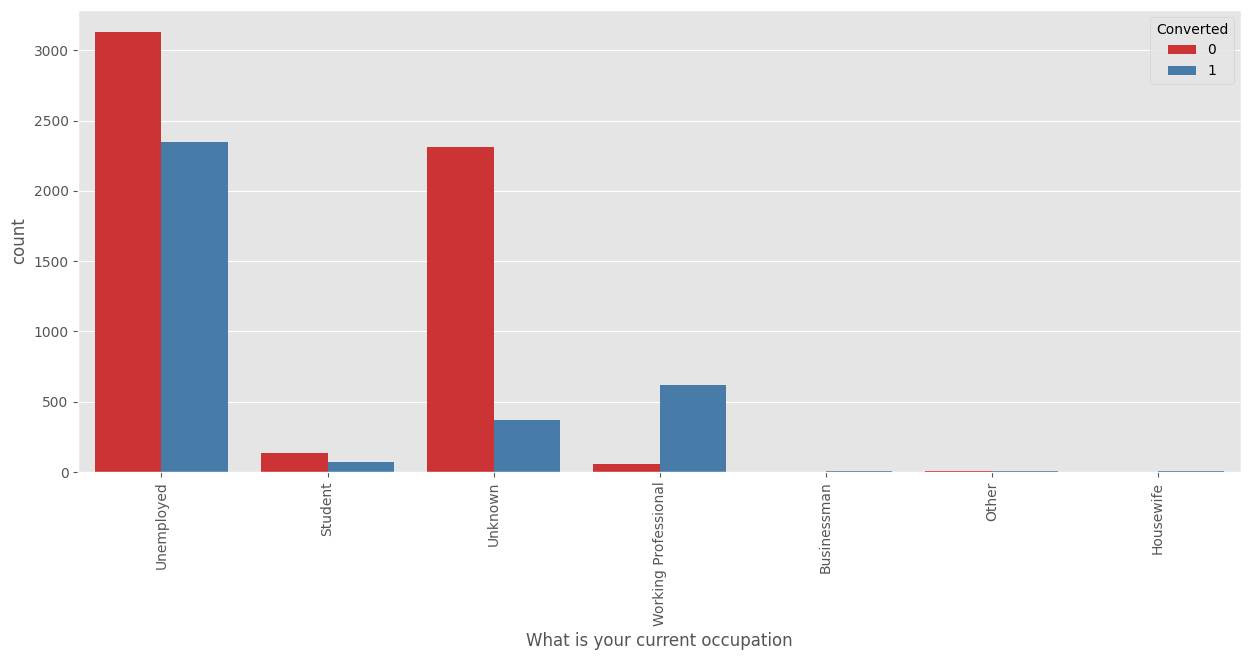

In [523]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

13. To evaluate the effectiveness of X Education's advertisements across various media channels and their reach to the target audience, we can visualize the data using a countplot. The goal is to compare the exposure levels of different media channels with a hue representing the reach in terms of lead (Converted 0/1)

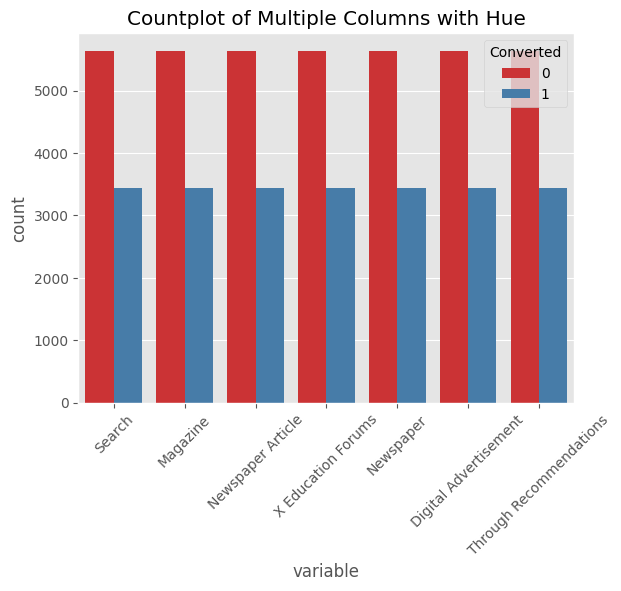

In [524]:
# Melt the DataFrame to "long-form" or "tidy" representation
data=lead_df[['Search', 'Magazine', 'Newspaper Article','Converted','X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations']]
df_melted = pd.melt(data, id_vars=['Converted'], value_vars=['Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],
                    var_name='variable',value_name='category')
# Create the countplot
sns.countplot(data=df_melted, x =df_melted['variable'] , hue='Converted',order=df_melted['variable'].value_counts().index, palette='Set1')
# Add titles and labels
plt.xticks(rotation=45)
plt.title('Countplot of Multiple Columns with Hue')
plt.show()

# 14) Tags

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0,

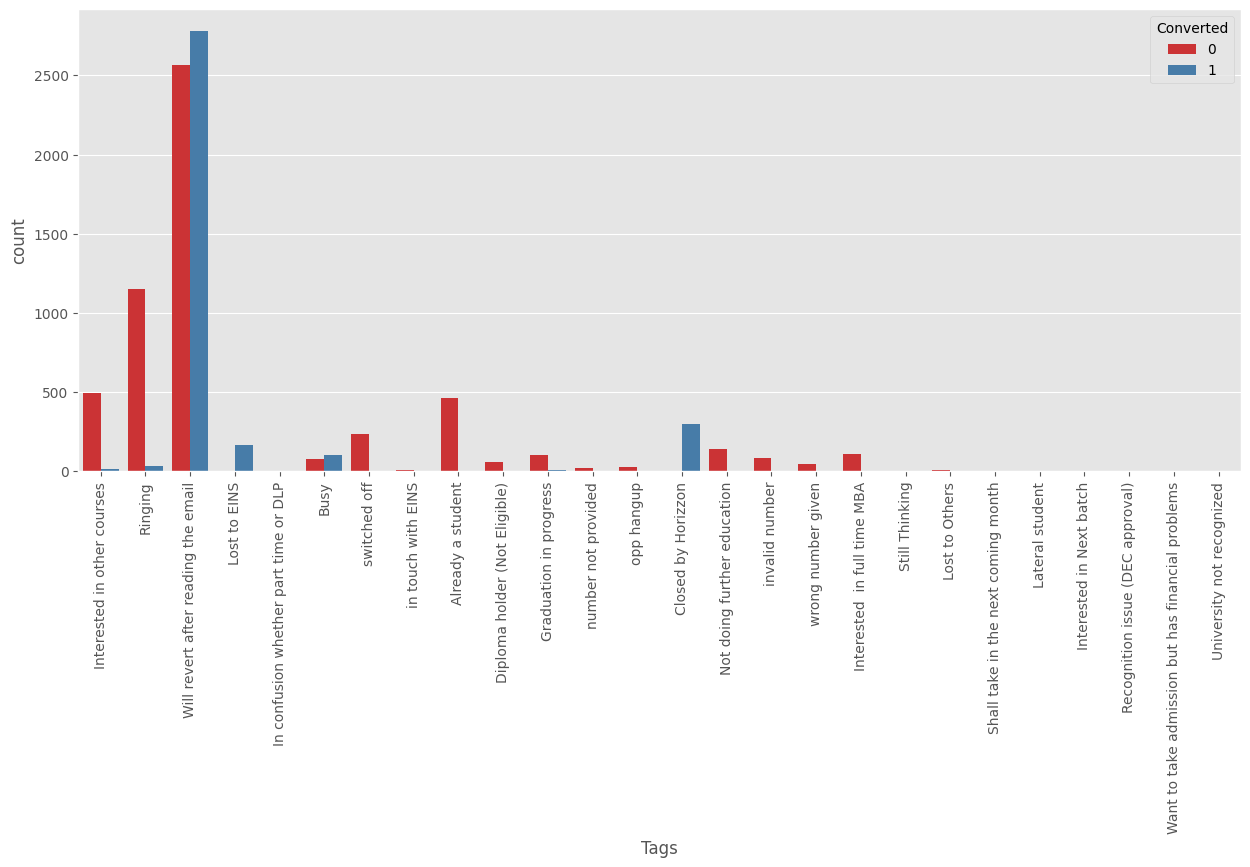

In [525]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

# **15) City**

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Thane & Outskirts'),
  Text(3, 0, 'Other Metro Cities'),
  Text(4, 0, 'Other Cities'),
  Text(5, 0, 'Other Cities of Maharashtra'),
  Text(6, 0, 'Tier II Cities')])

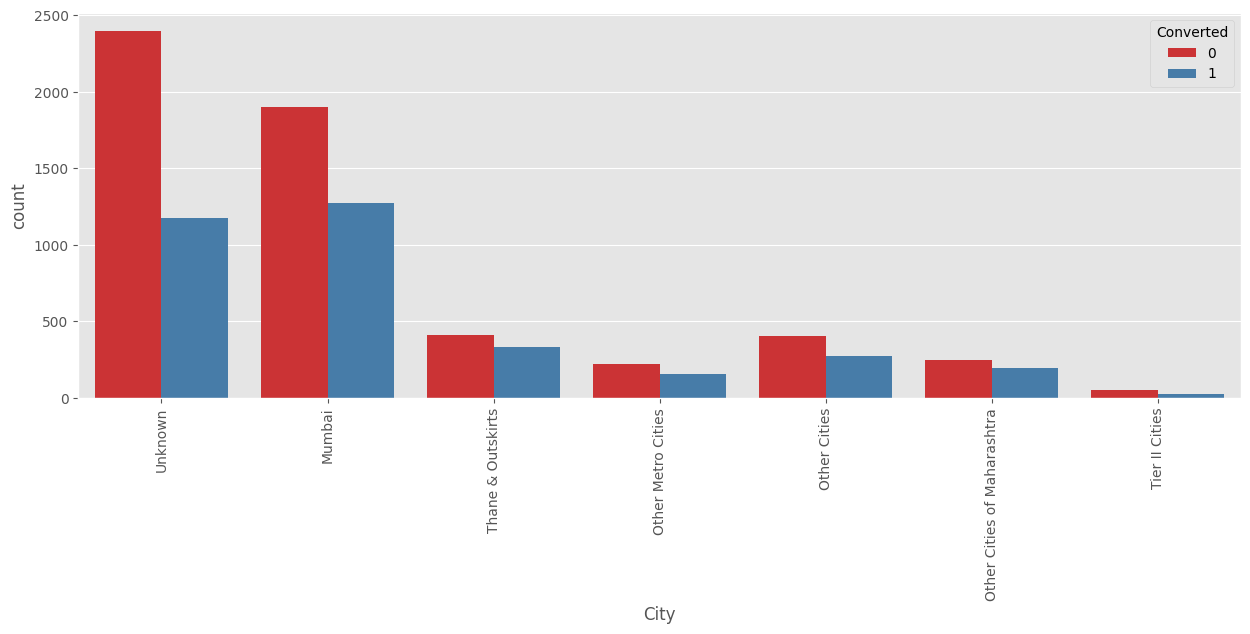

In [526]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

In [527]:
lead_df.shape

(9074, 29)

In [528]:
lead_df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


# **5. Label Encoding the categorical to Numerical**

In [529]:
cat_cols=lead_df.loc[:,lead_df.dtypes=='object']
cat_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'],
      dtype='object')

In [530]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for col in cat_cols.columns:
  lead_df[col]=label_encoder.fit_transform(lead_df[col])


NOTE: Following columns have only one unique value:

'I agree to pay the amount through cheque',

'Get updates on DM Content',

'Update me on Supply Chain Content',

'Receive More Updates About Our Courses',

'Magazine'

These columns are of no use as they have only one category of response from customer and can be dropped:

In [531]:
lead_df['Get updates on DM Content'].value_counts()
lead_df.drop(['Get updates on DM Content'],axis=1,inplace=True)
lead_df.drop(['I agree to pay the amount through cheque'],axis=1,inplace=True)
lead_df.drop(['Magazine'],axis=1,inplace=True)
lead_df.drop(['Newspaper'],axis=1,inplace=True)
lead_df.drop(['Receive More Updates About Our Courses'],axis=1,inplace=True)
lead_df.drop(['Update me on Supply Chain Content'],axis=1,inplace=True)


In [532]:
lead_df.shape

(9074, 23)

3.3.2 Dropping columns of no use for modeling
NOTE: Columns such as:

'Prospect ID',
'Lead Number',
'Last Notable Activity'
Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [533]:
lead_df.drop(['Prospect ID','Lead Number','Last Notable Activity'], axis=1,inplace=True)

# ***6. Train and Test Split***

In [534]:
from sklearn.model_selection import train_test_split
# Putting predictor variables to X
x=lead_df.drop(['Converted'],axis=1)

# Putting Target variables to y
y=lead_df['Converted']

# Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview
8174,2,6,0,0,0.0,0,0.0,8,36,13,4,0,0,0,0,0,14,6,0
6986,0,3,0,0,0.0,0,0.0,8,36,13,4,0,0,0,0,0,19,0,0
8112,2,6,0,0,0.0,0,0.0,8,36,7,6,0,0,0,0,0,19,6,0
8530,1,0,0,0,2.0,362,2.0,8,12,16,5,0,0,0,0,0,19,0,1
6444,0,3,0,0,6.0,168,1.2,7,36,13,4,0,0,0,0,0,8,6,0


In [535]:
print("x_train:", x_train.shape,"\ny_train:",y_train.shape)

x_train: (6351, 19) 
y_train: (6351,)


In [536]:
print("x_test:", x_test.shape,"\ny_test:",y_test.shape)

x_test: (2723, 19) 
y_test: (2723,)


## 7. Scaling the data

In [537]:
scaler = StandardScaler()

# x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# x_train.head()
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=x_train.select_dtypes(include=['int64','float64']).columns

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])



In [538]:
# x_train_scaled_df=pd.DataFrame(x_train,columns=x_train.columns)
# x_test_scaled_df=pd.DataFrame(x_test,columns=x_test.columns)

In [539]:
x_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview
8174,2.171469,2.007646,-0.292962,-0.017749,-1.145373,-0.892446,-1.264995,1.204001,1.646353,0.711071,-0.602067,-0.035514,-0.012549,-0.012549,-0.017749,-0.025104,-0.189533,1.103082,-0.677986
6986,-1.116408,0.395895,-0.292962,-0.017749,-1.145373,-0.892446,-1.264995,1.204001,1.646353,0.711071,-0.602067,-0.035514,-0.012549,-0.012549,-0.017749,-0.025104,0.588470,-1.132177,-0.677986
8112,2.171469,2.007646,-0.292962,-0.017749,-1.145373,-0.892446,-1.264995,1.204001,1.646353,-0.600516,2.302398,-0.035514,-0.012549,-0.012549,-0.017749,-0.025104,0.588470,1.103082,-0.677986
8530,0.527531,-1.215856,-0.292962,-0.017749,-0.422860,-0.229372,-0.142203,1.204001,-0.609828,1.366864,0.850165,-0.035514,-0.012549,-0.012549,-0.017749,-0.025104,0.588470,-1.132177,1.474958
6444,-1.116408,0.395895,-0.292962,-0.017749,1.022167,-0.584721,-0.591320,0.820424,1.646353,0.711071,-0.602067,-0.035514,-0.012549,-0.012549,-0.017749,-0.025104,-1.123137,1.103082,-0.677986


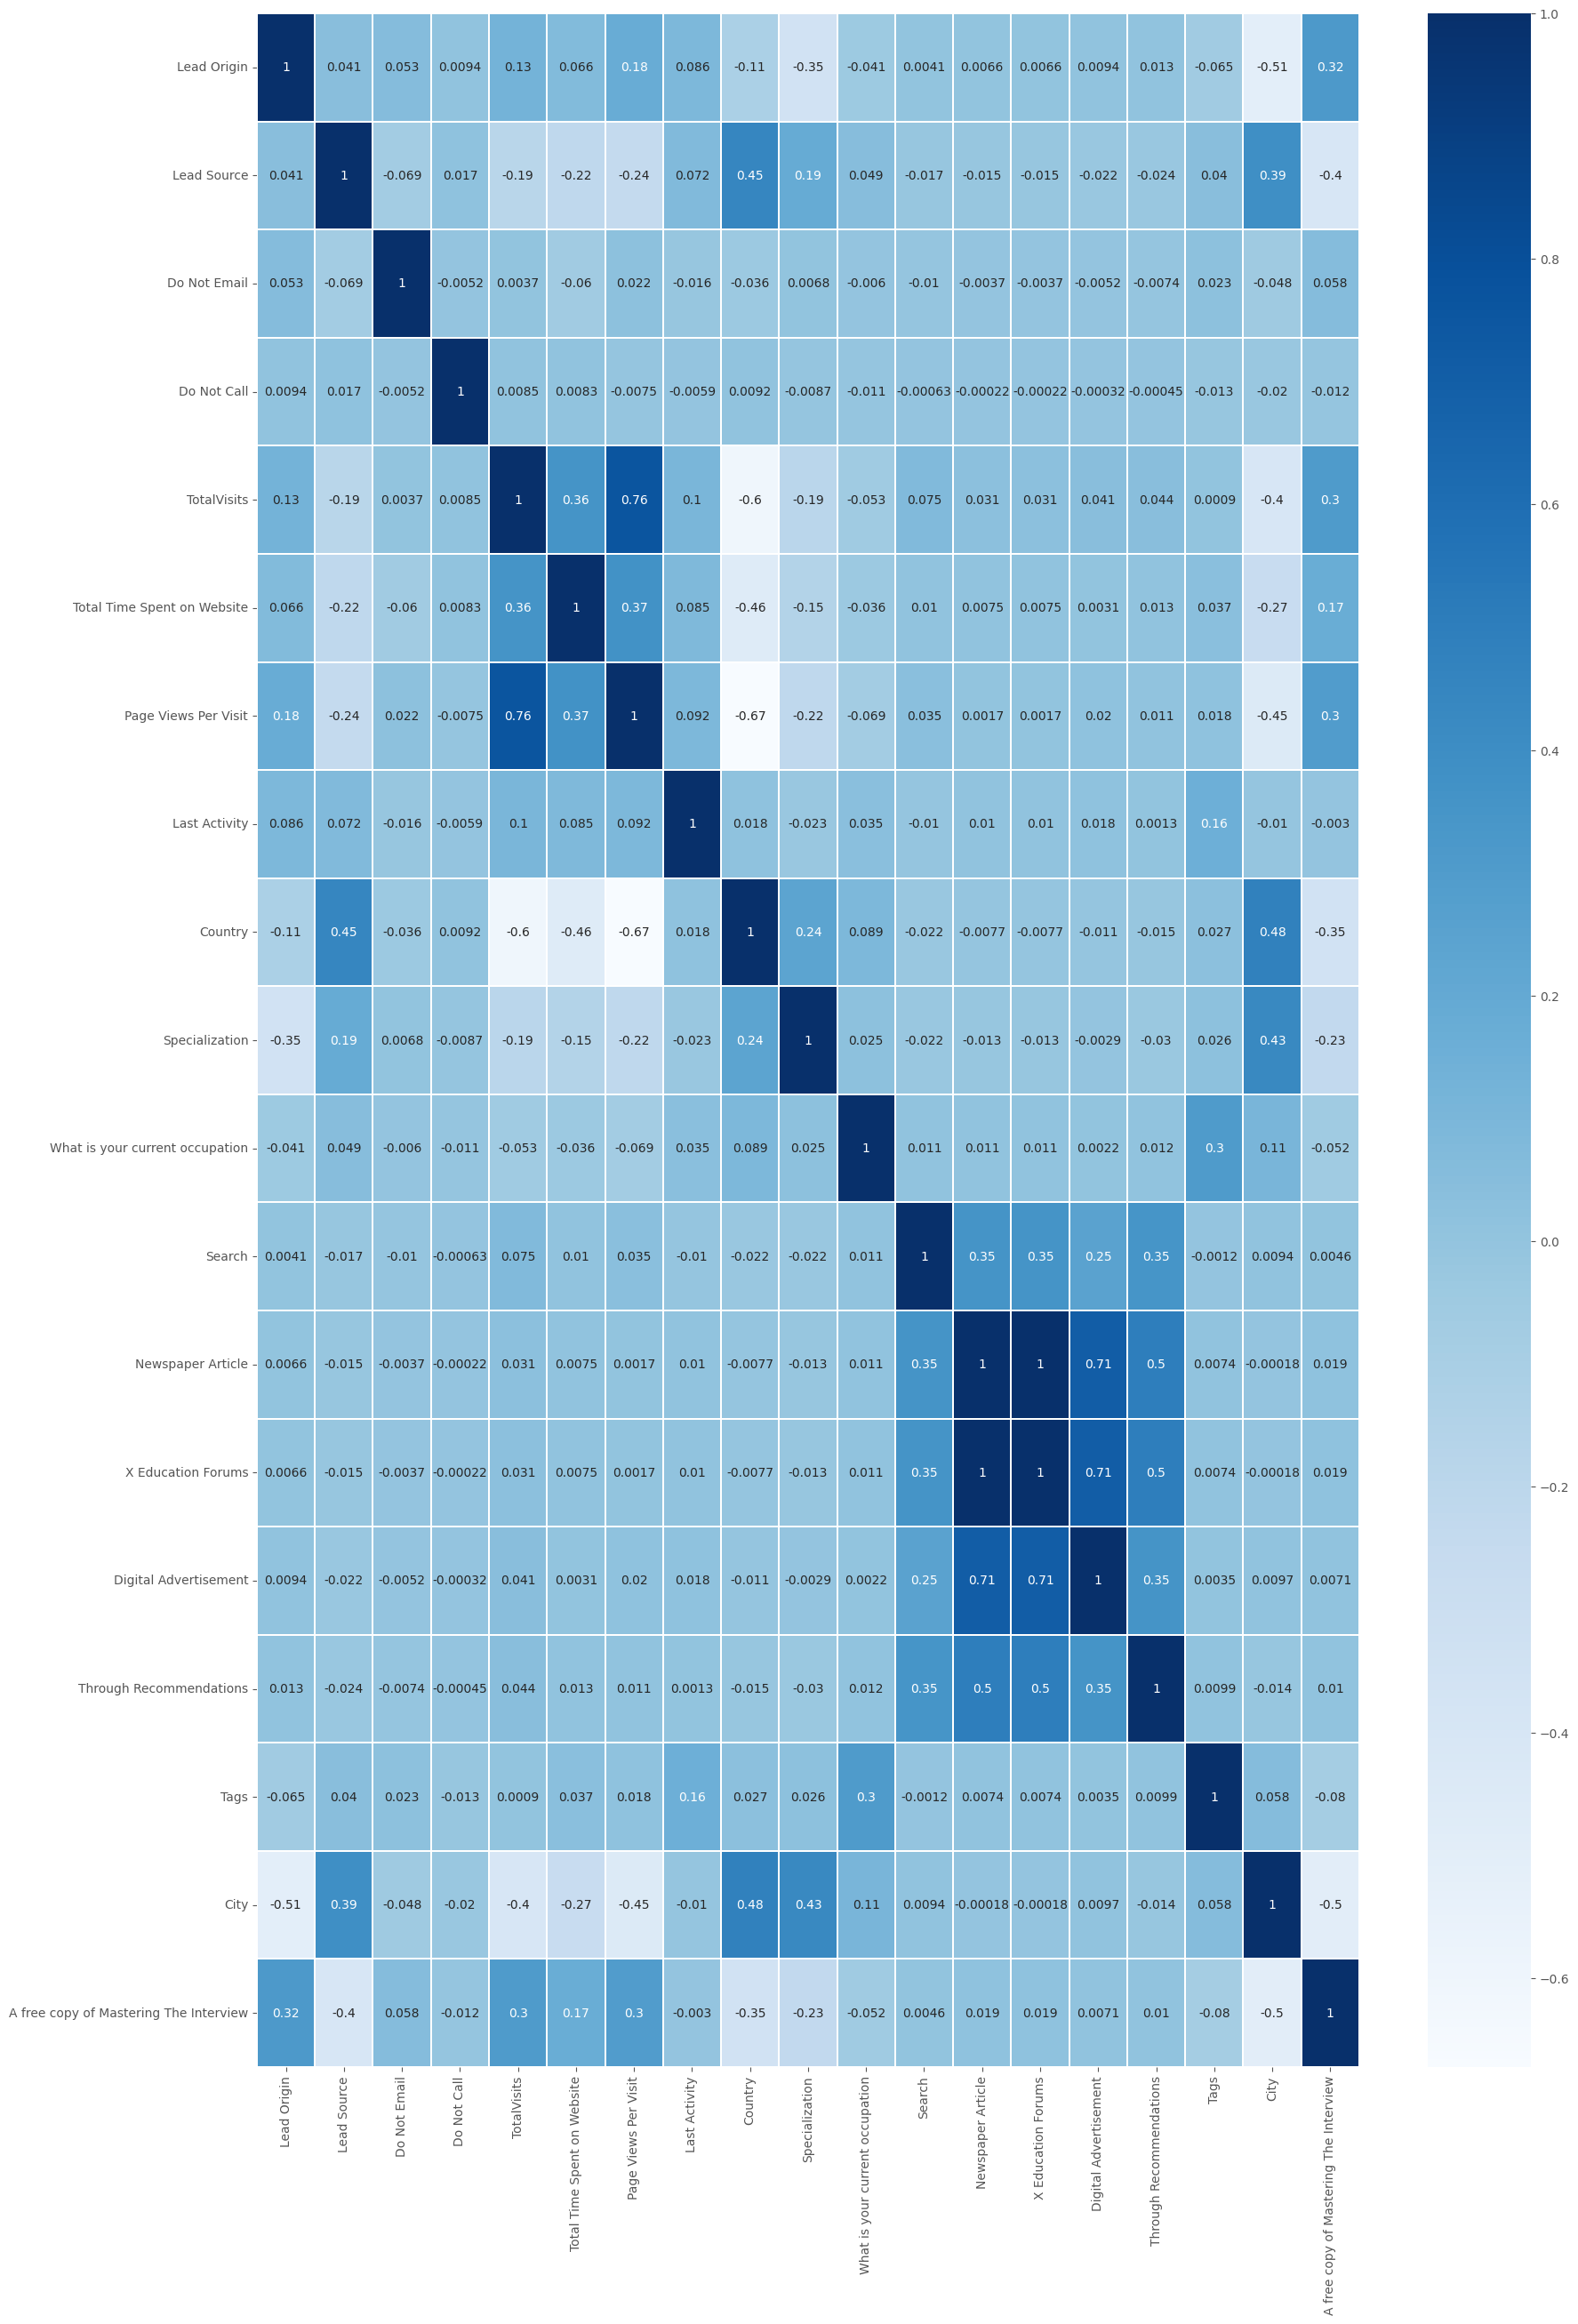

In [540]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(x_train.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [541]:
x_train.corr()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview
Lead Origin,1.000000,0.041471,0.052852,0.009363,0.130683,0.066305,0.180662,0.086080,-0.112068,-0.349253,-0.041006,0.004139,0.006620,0.006620,0.009363,0.013243,-0.064627,-0.509200,0.319206
Lead Source,0.041471,1.000000,-0.069316,0.016562,-0.187788,-0.216753,-0.241377,0.072328,0.450345,0.186482,0.049291,-0.016945,-0.015258,-0.015258,-0.021580,-0.023779,0.039628,0.387148,-0.403626
Do Not Email,0.052852,-0.069316,1.000000,-0.005200,0.003668,-0.059670,0.022129,-0.016181,-0.035796,0.006754,-0.006034,-0.010404,-0.003676,-0.003676,-0.005200,-0.007355,0.023113,-0.048179,0.057689
Do Not Call,0.009363,0.016562,-0.005200,1.000000,0.008524,0.008250,-0.007506,-0.005862,0.009198,-0.008718,-0.010686,-0.000630,-0.000223,-0.000223,-0.000315,-0.000446,-0.013030,-0.020094,-0.012033
TotalVisits,0.130683,-0.187788,0.003668,0.008524,1.000000,0.357293,0.764409,0.099741,-0.603565,-0.192446,-0.053197,0.074790,0.030961,0.030961,0.040583,0.043799,0.000901,-0.402909,0.303826
Total Time Spent on Website,0.066305,-0.216753,-0.059670,0.008250,0.357293,1.000000,0.368790,0.084777,-0.459944,-0.153302,-0.036308,0.010174,0.007511,0.007511,0.003114,0.012877,0.036509,-0.268309,0.173703
Page Views Per Visit,0.180662,-0.241377,0.022129,-0.007506,0.764409,0.368790,1.000000,0.091721,-0.672543,-0.221208,-0.068512,0.034750,0.001738,0.001738,0.019895,0.010876,0.017908,-0.445828,0.299510
Last Activity,0.086080,0.072328,-0.016181,-0.005862,0.099741,0.084777,0.091721,1.000000,0.018257,-0.023237,0.034703,-0.010028,0.010296,0.010296,0.017965,0.001337,0.156635,-0.010228,-0.003023
Country,-0.112068,0.450345,-0.035796,0.009198,-0.603565,-0.459944,-0.672543,0.018257,1.000000,0.239587,0.089202,-0.021657,-0.007653,-0.007653,-0.010824,-0.015309,0.026951,0.479119,-0.346436
Specialization,-0.349253,0.186482,0.006754,-0.008718,-0.192446,-0.153302,-0.221208,-0.023237,0.239587,1.000000,0.025433,-0.022297,-0.013022,-0.013022,-0.002899,-0.030167,0.025612,0.430622,-0.233740


In [542]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15)
rfe.fit(x_train,y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [543]:
# Now we will check which features are selected
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('Search', False, 5),
 ('Newspaper Article', False, 2),
 ('X Education Forums', False, 3),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 4),
 ('Tags', True, 1),
 ('City', True, 1),
 ('A free copy of Mastering The Interview', True, 1)]

In [544]:
from operator import itemgetter
features=x_train.columns.to_list()
for x,y in (sorted(zip(rfe.ranking_,features),key=itemgetter(0))):
  print(x,y)

1 Lead Origin
1 Lead Source
1 Do Not Email
1 Do Not Call
1 TotalVisits
1 Total Time Spent on Website
1 Page Views Per Visit
1 Last Activity
1 Country
1 Specialization
1 What is your current occupation
1 Digital Advertisement
1 Tags
1 City
1 A free copy of Mastering The Interview
2 Newspaper Article
3 X Education Forums
4 Through Recommendations
5 Search


In [545]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=x_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Lead Origin,True,1
16,Tags,True,1
14,Digital Advertisement,True,1
10,What is your current occupation,True,1
17,City,True,1
8,Country,True,1
7,Last Activity,True,1
9,Specialization,True,1
5,Total Time Spent on Website,True,1
4,TotalVisits,True,1


In [546]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [547]:
# Select only those columns whihc have been selected by RFE
col=x_train.columns[rfe.support_]
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation', 'Digital Advertisement', 'Tags',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [548]:
# columns which are not selected by RFE
x_train.columns[~rfe.support_]

Index(['Search', 'Newspaper Article', 'X Education Forums', 'Through Recommendations'], dtype='object')

In [549]:
# # Transform the training data to include only the selected features
x_train_selected = rfe.transform(x_train)
# # # Convert back to DataFrame with selected feature names
x_train_selected_df = pd.DataFrame(x_train_selected, columns=col)
#x_train_selected_df.head()


In [550]:
import statsmodels.api as sm
# Building model using statsmodels, for the detailed statistics

# Reset index of both x_train_selected_df and y_train
x_train_sm= x_train_selected_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_train_sm=sm.add_constant(x_train_selected_df[col])
logreg_sm=sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res=logreg_sm.fit()
res.params
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3070.4
Date:                Tue, 28 Jan 2025   Deviance:                       6140.9
Time:                        06:30:57   Pearson chi2:                 6.52e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3056
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6437      8.803     -0.073      0.942     -17.897      16.610
Lead Origin                                0.4518      0.041     11.144      0.000       0.372       0.531
Lead Source                                0.4552      0.041     11.203      0.000       0.376       0.535
Do Not Email                              -0.4195      0.042    -10.032      0.000      -0.501      -0.338
Do Not Call                                0.3632    366.608      0.001      0.999    -718.174     718.901
TotalVisits                                0.1711      0.050      3.397      0.001       0.072       0.270
Total Time Spent on Website                1.1770      0.039     30.138      0.000       1.100       1.254
Page Views Per Visit                      -0.3808      0.055     -6.921      0.000      -0.489      -0.273
Last Activity                              0.5150      0.034     15.276      0.000       0.449       0.581
Country                                    0.4264      0.051      8.291      0.000       0.326       0.527
Specialization                            -0.1659      0.036     -4.642      0.000      -0.236      -0.096
What is your current occupation           -0.0459      0.032     -1.416      0.157      -0.109       0.018
Digital Advertisement                     -0.3786    334.055     -0.001      0.999    -655.115     654.357
Tags                                       0.3315      0.036      9.324      0.000       0.262       0.401
City                                      -0.1286      0.048     -2.692      0.007      -0.222      -0.035
A free copy of Mastering The Interview    -0.1444      0.039     -3.733      0.000      -0.220      -0.069
==========================================================================================================
"""

In [551]:
res.params

,0
const,-0.643718
Lead Origin,0.451782
Lead Source,0.455182
Do Not Email,-0.419500
Do Not Call,0.363239
TotalVisits,0.171117
Total Time Spent on Website,1.176991
Page Views Per Visit,-0.380757
Last Activity,0.515028
Country,0.426401


In [552]:
vif=pd.DataFrame()
x_train_selected_df= pd.DataFrame(x_train_selected, columns=col)
vif['Features']=x_train_selected_df.columns
vif['VIF']=[variance_inflation_factor(x_train_selected_df.values,i) for i in range(x_train_selected_df.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Page Views Per Visit,2.98
4,TotalVisits,2.60
8,Country,2.52
13,City,2.27
0,Lead Origin,1.64
1,Lead Source,1.61
14,A free copy of Mastering The Interview,1.51
5,Total Time Spent on Website,1.31
9,Specialization,1.28
12,Tags,1.14


In [553]:
# Since Pvalue of 'Do Not Call' and 'Digital Advertisements' is very high, we can drop this column.
col = col.drop(['Do Not Call'])
col = col.drop('Digital Advertisement')


# **Model 2**

In [554]:
# Creating X_train dataframe with variables selected by RFE
x_train_selected = x_train[col]
# Convert back to DataFrame with selected feature names

x_train_selected= x_train_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Adding a constant variable
x_train_sm = sm.add_constant(x_train_selected)


# Create a fitted model
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3072.2
Date:                Tue, 28 Jan 2025   Deviance:                       6144.4
Time:                        06:30:57   Pearson chi2:                 6.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3052
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6438      0.033    -19.684      0.000      -0.708      -0.580
Lead Origin                                0.4503      0.041     11.115      0.000       0.371       0.530
Lead Source                                0.4576      0.041     11.271      0.000       0.378       0.537
Do Not Email                              -0.4192      0.042    -10.025      0.000      -0.501      -0.337
TotalVisits                                0.1680      0.050      3.342      0.001       0.069       0.267
Total Time Spent on Website                1.1777      0.039     30.162      0.000       1.101       1.254
Page Views Per Visit                      -0.3798      0.055     -6.909      0.000      -0.487      -0.272
Last Activity                              0.5144      0.034     15.259      0.000       0.448       0.580
Country                                    0.4265      0.051      8.294      0.000       0.326       0.527
Specialization                            -0.1656      0.036     -4.633      0.000      -0.236      -0.096
What is your current occupation           -0.0464      0.032     -1.432      0.152      -0.110       0.017
Tags                                       0.3310      0.036      9.313      0.000       0.261       0.401
City                                      -0.1323      0.048     -2.773      0.006      -0.226      -0.039
A free copy of Mastering The Interview    -0.1453      0.039     -3.759      0.000      -0.221      -0.070
==========================================================================================================
"""

In [555]:
res.params

,0
const,-0.643785
Lead Origin,0.450260
Lead Source,0.457607
Do Not Email,-0.419227
TotalVisits,0.167995
Total Time Spent on Website,1.177749
Page Views Per Visit,-0.379750
Last Activity,0.514409
Country,0.426517
Specialization,-0.165552


In [556]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Page Views Per Visit,2.98
3,TotalVisits,2.60
7,Country,2.52
11,City,2.27
0,Lead Origin,1.64
1,Lead Source,1.61
12,A free copy of Mastering The Interview,1.51
4,Total Time Spent on Website,1.31
8,Specialization,1.28
10,Tags,1.14


In [557]:
col = col.drop('What is your current occupation')

# **Model 3**

In [558]:
# x_train_selected = x_train[col]
# x_train_sm = sm.add_constant(x_train_selected_df[col])
# #x_train = x_train.reset_index(drop=True)
# #y_train = y_train.reset_index(drop=True)
# logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
# res = logm3.fit()
# res.summary()


In [559]:
# Creating X_train dataframe with variables selected by RFE
x_train_selected = x_train[col]
# Convert back to DataFrame with selected feature names

x_train_selected= x_train_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Adding a constant variable
x_train_sm = sm.add_constant(x_train_selected)


# Create a fitted model
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3073.2
Date:                Tue, 28 Jan 2025   Deviance:                       6146.5
Time:                        06:30:58   Pearson chi2:                 6.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3049
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6444      0.033    -19.705      0.000      -0.709      -0.580
Lead Origin                                0.4487      0.040     11.088      0.000       0.369       0.528
Lead Source                                0.4576      0.041     11.279      0.000       0.378       0.537
Do Not Email                              -0.4186      0.042    -10.014      0.000      -0.501      -0.337
TotalVisits                                0.1675      0.050      3.332      0.001       0.069       0.266
Total Time Spent on Website                1.1778      0.039     30.168      0.000       1.101       1.254
Page Views Per Visit                      -0.3776      0.055     -6.875      0.000      -0.485      -0.270
Last Activity                              0.5150      0.034     15.279      0.000       0.449       0.581
Country                                    0.4248      0.051      8.263      0.000       0.324       0.526
Specialization                            -0.1645      0.036     -4.604      0.000      -0.235      -0.094
Tags                                       0.3181      0.034      9.243      0.000       0.251       0.386
City                                      -0.1366      0.048     -2.870      0.004      -0.230      -0.043
A free copy of Mastering The Interview    -0.1464      0.039     -3.787      0.000      -0.222      -0.071
==========================================================================================================
"""

In [560]:
res.params

,0
const,-0.644433
Lead Origin,0.448676
Lead Source,0.457626
Do Not Email,-0.418580
TotalVisits,0.167506
Total Time Spent on Website,1.177823
Page Views Per Visit,-0.377597
Last Activity,0.515049
Country,0.424772
Specialization,-0.164523


In [561]:
#Let's see the summary of our logistic regression model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3073.2
Date:                Tue, 28 Jan 2025   Deviance:                       6146.5
Time:                        06:30:58   Pearson chi2:                 6.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3049
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

NOTE: Looks like Model 3 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

we checked the VIFs for these variables to check if there is any multicollinearity which exists among the independent variables> All the VIF values are also within the range of 1 to 5 which is acceptable.

In [562]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Page Views Per Visit,2.97
3,TotalVisits,2.60
7,Country,2.51
10,City,2.25
0,Lead Origin,1.64
1,Lead Source,1.61
11,A free copy of Mastering The Interview,1.51
4,Total Time Spent on Website,1.31
8,Specialization,1.28
6,Last Activity,1.07


## <strong><span style="color:brown">Step 8: Model Evaluation </span></strong>
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [563]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

,0
0,0.845088
1,0.509175
2,0.896584
3,0.295952
4,0.368290
5,0.869268
6,0.269164
7,0.543354
8,0.239748
9,0.305171


In [564]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84508805, 0.50917478, 0.89658393, 0.29595152, 0.36829042,
       0.8692678 , 0.26916402, 0.54335402, 0.23974845, 0.30517127])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [565]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.845088,0
1,1,0.509175,1
2,1,0.896584,2
3,0,0.295952,3
4,0,0.368290,4


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [566]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.845088,0,1
1,1,0.509175,1,1
2,1,0.896584,2,1
3,0,0.295952,3,0
4,0,0.368290,4,0


Making the Confusion matrix

In [567]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3418  497]
 [ 927 1509]]


In [568]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3418       |   497
# converted           927        |   1509

### Above is the confusion matrix when we use threshold of probability as 0.5

In [569]:
# Checking the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7757833412061093


Metrics beyond simply accuracy
Sensitivity and Specificity
When we have Predicted at threshold 0.5 probability

In [570]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [571]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6194581280788177


In [572]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8730523627075352


In [573]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1269476372924649


In [574]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7522432701894317


In [575]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7866513233601842


We found out that our specificity was good (~87%) but our sensitivity was only 62%. Hence, this needed to be taken care of.
We have got sensitivity of 62% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

# **Plotting the ROC Curve**

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in
sensitivity will be accompanied by a decrease in specificity).
2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3) The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [576]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [577]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

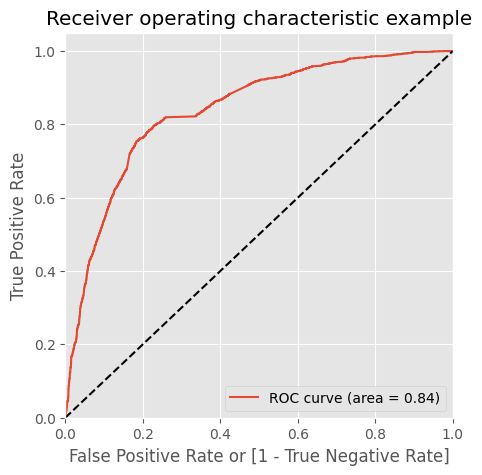

In [578]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.84) area under the ROC curve , therefore our model is a good one.

# **Finding Optimal Cutoff Point/ Probability**

Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [579]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.845088,0,1,1,1,1,1,1,1,1,1,1,0
1,1,0.509175,1,1,1,1,1,1,1,1,0,0,0,0
2,1,0.896584,2,1,1,1,1,1,1,1,1,1,1,0
3,0,0.295952,3,0,1,1,1,0,0,0,0,0,0,0
4,0,0.368290,4,0,1,1,1,1,0,0,0,0,0,0


In [580]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383562  1.000000  0.000000
0.1   0.1  0.521020  0.981938  0.234227
0.2   0.2  0.660368  0.920361  0.498595
0.3   0.3  0.771375  0.818966  0.741762
0.4   0.4  0.790899  0.743842  0.820179
0.5   0.5  0.775783  0.619458  0.873052
0.6   0.6  0.757991  0.518473  0.907024
0.7   0.7  0.739569  0.419130  0.938953
0.8   0.8  0.701779  0.283251  0.962197
0.9   0.9  0.650134  0.105090  0.989272


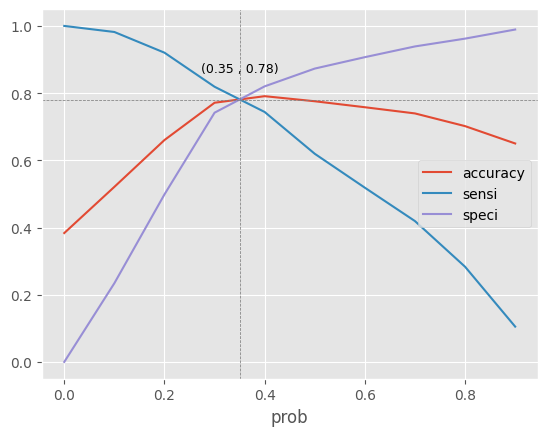

In [581]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


<strong><span style="color:Blue">NOTE:</span></strong> 0.35 is the approx. point where all the curves meet, so 0.35 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point

In [582]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.35 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted
0,0,0.845088,0,1
1,1,0.509175,1,1
2,1,0.896584,2,1
3,0,0.295952,3,0
4,0,0.368290,4,1


### Calculating all metrics using confusion matrix for Train

In [583]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.78349866162809


In [584]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))



In [585]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3071  844]
 [ 531 1905]] 

************************************************** 

True Negative                    :  3071
True Positive                    :  1905
False Negative                   :  531
False Positve                    :  844
Model Accuracy                   :  0.7835
Model Sensitivity                :  0.782
Model Specificity                :  0.7844
Model Precision                  :  0.693
Model Recall                     :  0.782
Model True Positive Rate (TPR)   :  0.782
Model False Positive Rate (FPR)  :  0.2156


************************************************** 



### Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensitivity view and get better probability threshold for boosting conversion rate to 80%.

In [586]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

In [587]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

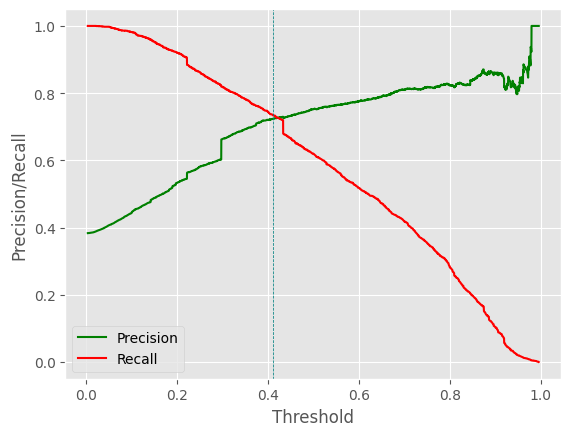

In [588]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [589]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [590]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.845088,0,1,1
1,1,0.509175,1,1,1
2,1,0.896584,2,1,1
3,0,0.295952,3,0,0
4,0,0.368290,4,1,0


In [591]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.35 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3230  685]
 [ 645 1791]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1791
False Negative                   :  645
False Positve                    :  685
Model Accuracy                   :  0.7906
Model Sensitivity                :  0.7352
Model Specificity                :  0.825
Model Precision                  :  0.7233
Model Recall                     :  0.7352
Model True Positive Rate (TPR)   :  0.7352
Model False Positive Rate (FPR)  :  0.175


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong>
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 73%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.355. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.


### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong>
- A higher score would mean that the lead is hot, i.e. is most likely to convert
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [592]:
  # Lets add Lead Score

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.845088,0,1,85
1,1,0.509175,1,1,51
2,1,0.896584,2,1,90
3,0,0.295952,3,0,30
4,0,0.368290,4,1,37


## <strong><span style="color:brown">Step 10: Making Predictions on test set </span></strong>

### 10.1 Scaling Test dataset

In [593]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 3374 to 7582
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             2723 non-null   int64  
 1   Lead Source                             2723 non-null   int64  
 2   Do Not Email                            2723 non-null   int64  
 3   Do Not Call                             2723 non-null   int64  
 4   TotalVisits                             2723 non-null   float64
 5   Total Time Spent on Website             2723 non-null   int64  
 6   Page Views Per Visit                    2723 non-null   float64
 7   Last Activity                           2723 non-null   int64  
 8   Country                                 2723 non-null   int64  
 9   Specialization                          2723 non-null   int64  
 10  What is your current occupation         2723 non-null   int64 

In [594]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=x_test.select_dtypes(include=['int64','float64']).columns

num_cols
# scaling columns
x_test[num_cols] = scaler.transform(x_test[num_cols])

x_test = x_test[col]
x_test.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Tags,City,A free copy of Mastering The Interview
3374,0.527531,-1.215856,-0.292962,1.022167,-0.777049,0.419194,1.204001,-0.609828,-0.381918,0.58847,-0.387091,1.474958
4262,-1.116408,0.395895,-0.292962,-1.145373,-0.892446,-1.264995,-0.713885,1.646353,0.711071,0.58847,1.103082,-0.677986
7855,-1.116408,-0.141355,-0.292962,-0.061603,-0.740415,0.419194,0.053270,-0.609828,0.711071,0.58847,1.103082,-0.677986
3017,0.527531,-0.141355,-0.292962,0.299654,1.256134,0.980590,-1.097462,-0.609828,1.585462,0.58847,-1.132177,-0.677986
560,-1.116408,0.395895,-0.292962,0.660910,1.648118,-0.327463,-0.713885,-0.609828,-2.130700,0.58847,0.357996,1.474958


### 10.2 Prediction on Test Dataset using final model

In [595]:
# Select the columns used for training after feature scaling
x_test = x_test[x_train_sm.columns[1:]] # Select columns, excluding the constant

# Adding constant value
x_test_sm = sm.add_constant(x_test)

x_test_sm.shape

(2723, 13)

In [596]:
# making prediction using model  (final model)
# Ensure x_test_sm has the same column order as x_train_sm
x_test_sm = x_test_sm[x_train_sm.columns]  # Reorder columns to match training data
# Get the parameters (weights) from the trained model
params = res.params

# Select the relevant parameters based on the columns in x_test_sm
# This ensures the shapes are aligned for prediction
relevant_params = params[x_test_sm.columns]

# Now predict using the relevant parameters and the test data
y_test_pred = logm3.predict(params=relevant_params, exog=x_test_sm)
#y_test_pred = logm3.predict(x_test_sm)

In [597]:
# top 10 columns
y_test_pred[:10]

array([0.21488202, 0.22157207, 0.08778618, 0.54131194, 0.7271438 ,
       0.07207578, 0.76703604, 0.14028769, 0.41719747, 0.78435122])

In [598]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
0,0.214882
1,0.221572
2,0.087786
3,0.541312
4,0.727144


In [599]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3374,0
4262,0
7855,0
3017,1
560,1


In [600]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3374,0.214882
1,0,4262,0.221572
2,0,7855,0.087786
3,1,3017,0.541312
4,1,560,0.727144


In [601]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3374,0,0.214882
1,4262,0,0.221572
2,7855,0,0.087786
3,3017,1,0.541312
4,560,1,0.727144


In [602]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3374,0,0.214882,0
1,4262,0,0.221572,0
2,7855,0,0.087786,0
3,3017,1,0.541312,1
4,560,1,0.727144,1


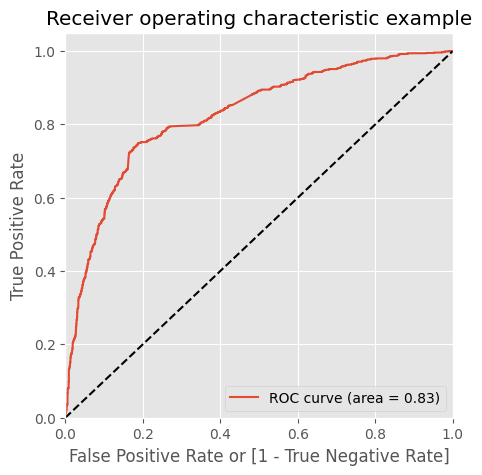

In [603]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.83 out of 1 which indicates a good predictive model

<strong><span style="color:Blue">NOTE:</span></strong>
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set.
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

###Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [604]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1421  303]
 [ 265  734]] 

************************************************** 

True Negative                    :  1421
True Positive                    :  734
False Negative                   :  265
False Positve                    :  303
Model Accuracy                   :  0.7914
Model Sensitivity                :  0.7347
Model Specificity                :  0.8242
Model Precision                  :  0.7078
Model Recall                     :  0.7347
Model True Positive Rate (TPR)   :  0.7347
Model False Positive Rate (FPR)  :  0.1758


************************************************** 



In [606]:
# features and their coefficicent from final model
parameters=res.params.sort_values(ascending=False)
parameters

,0
Total Time Spent on Website,1.177823
Last Activity,0.515049
Lead Source,0.457626
Lead Origin,0.448676
Country,0.424772
Tags,0.318073
TotalVisits,0.167506
City,-0.136641
A free copy of Mastering The Interview,-0.146387
Specialization,-0.164523


In [607]:
# Lets add Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,3374,0,0.214882,0,21
1,4262,0,0.221572,0,22
2,7855,0,0.087786,0,9
3,3017,1,0.541312,1,54
4,560,1,0.727144,1,73


<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance
- The customers with a lower lead score have a lower conversion chance.

### <strong><span style="color:purple">To increase our Lead Conversion Rates: </span></strong>  

- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on X Education Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.


### <strong><span style="color:purple">To identify areas of improvement: </span></strong>  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.



